# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [311]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from scipy.stats import ks_2samp

import statsmodels.formula.api as smf

In [312]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url,
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada.
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [314]:
# Montando função para criação de bivariadas

def data_bivariada(data, var_resp, var_exp):

  tab = pd.crosstab(data[var_exp], data[var_resp], margins= True) # Número de saudáveis, Número de doentes, Total de doentes
  tab['média_doentes'] = tab[1]/tab['All'] # Quantidade média de doentes
  tab['odds'] = tab[1]/tab[0] # odds
  tab['RC_vs_All'] = tab['odds']/tab.loc['All','odds'] # Odds ratio (Use o total como referência)
  tab['logito'] = np.log(tab['odds']) # Logito (LOG(Odds))
  tab['woe'] = np.log(tab['RC_vs_All']) # O LOG do Odds ratio (com o total como referência) - WOE

  return tab



In [315]:
# Montando a bivariada de pelo menos três variáveis qualitativas do data-frame

data_bivariada(df, 'flag_doente', 'sex')

flag_doente,0,1,All,média_doentes,odds,RC_vs_All,logito,woe
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [316]:
data_bivariada(df, 'flag_doente', 'exang')

flag_doente,0,1,All,média_doentes,odds,RC_vs_All,logito,woe
exang,,,,,,,,
0.0,141,63,204,0.308824,0.446809,0.527170,-0.805625,-0.640233
1.0,23,76,99,0.767677,3.304348,3.898655,1.195239,1.360632
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [317]:
data_bivariada(df, 'flag_doente', 'cp')

flag_doente,0,1,All,média_doentes,odds,RC_vs_All,logito,woe
cp,,,,,,,,
1.0,16,7,23,0.304348,0.437500,0.516187,-0.826679,-0.661286
2.0,41,9,50,0.180000,0.219512,0.258993,-1.516347,-1.350955
3.0,68,18,86,0.209302,0.264706,0.312315,-1.329136,-1.163743
4.0,39,105,144,0.729167,2.692308,3.176536,0.990399,1.155791
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


*Entre as bivariadas analisadas acima, pacientes com cp 4 (com tipo de dor no peito assintomático) parecer apresentar mais risco*

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [318]:
# Montando uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como age

def data_bivariada_cont(data, var_resp, var_exp, quant_categ=5):

  data['group_'+ var_exp] = pd.cut(data[var_exp], quant_categ, duplicates='drop')

  tab_2 = pd.crosstab(data['group_'+ var_exp], data[var_resp], margins= True) # Número de saudáveis, Número de doentes, Total de doentes
  tab_2['média_doentes'] = tab_2[1]/tab_2['All'] # Quantidade média de doentes
  tab_2['odds'] = tab_2[1]/tab_2[0] # odds
  tab_2['RC_vs_All'] = tab_2['odds']/tab_2.loc['All','odds'] # Odds ratio (Use o total como referência)
  tab_2['logito'] = np.log(tab_2['odds']) # Logito (LOG(Odds))
  tab_2['woe'] = np.log(tab_2['RC_vs_All']) # O LOG do Odds ratio (com o total como referência) - WOE

  return tab_2

3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [319]:
# Construindo modelo de regressão logística com as variáveis qualitativas: sex + cp + trestbps e com a variável quantitativa age

reglog = smf.logit("flag_doente ~ C(sex) + C(cp) + trestbps + age"
                   , data=df).fit()

reglog.summary()

Optimization terminated successfully.
         Current function value: 0.476154
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Fri, 10 Nov 2023   Pseudo R-squ.:                  0.3097
Time:                        20:49:52   Log-Likelihood:                -144.27
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.692e-25
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -8.3407      1.621     -5.145      0.000     -11.518      -5.163
C(sex)[T.1.0]     1.8094      0.353      5.130      0.000       1.118       2.501
C(cp)[T.2.0]     -0.0617      0.636     -0.097      0.923      -1.309       1.186
C(cp)[T.3.0]      0.0715      0.573      0.125      0.901      -1.051       1.194
C(cp)[T.4.0]      2.4789      0.553      4.485      0.000       1.396       3.562
trestbps          0.0193      0.009      2.261      0.024       0.003       0.036
age               0.0567      0.018      3.120      0.002       0.021       0.092
=================================================================================
"""

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [320]:
# Calculando a probabilidade de evento predita segundo o seu modelo

df['predito'] = reglog.predict(df)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0.458229
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,0.944123
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,0.886566
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0.134929
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0.027278


In [321]:
# Categorizando a probabilidade em G=5 grupos

df['group_predito'] = pd.qcut(df['predito'], 5, duplicates='drop')


In [322]:
# Calculando a probabilidade de evento predita média por grupo

df[['predito', 'group_predito']].groupby(by='group_predito').mean()

,predito
group_predito,
"(0.0131, 0.143]",0.072008
"(0.143, 0.287]",0.209626
"(0.287, 0.586]",0.435175
"(0.586, 0.822]",0.708861
"(0.822, 0.944]",0.874819


In [323]:
# Calculando a taxa de eventos (média da variável indicadora de eventos) por grupo

df[['flag_doente', 'predito', 'group_predito']].groupby(by='group_predito').mean()

,flag_doente,predito
group_predito,,
"(0.0131, 0.143]",0.080645,0.072008
"(0.143, 0.287]",0.152542,0.209626
"(0.287, 0.586]",0.483871,0.435175
"(0.586, 0.822]",0.762712,0.708861
"(0.822, 0.944]",0.819672,0.874819


<Axes: xlabel='group_predito'>

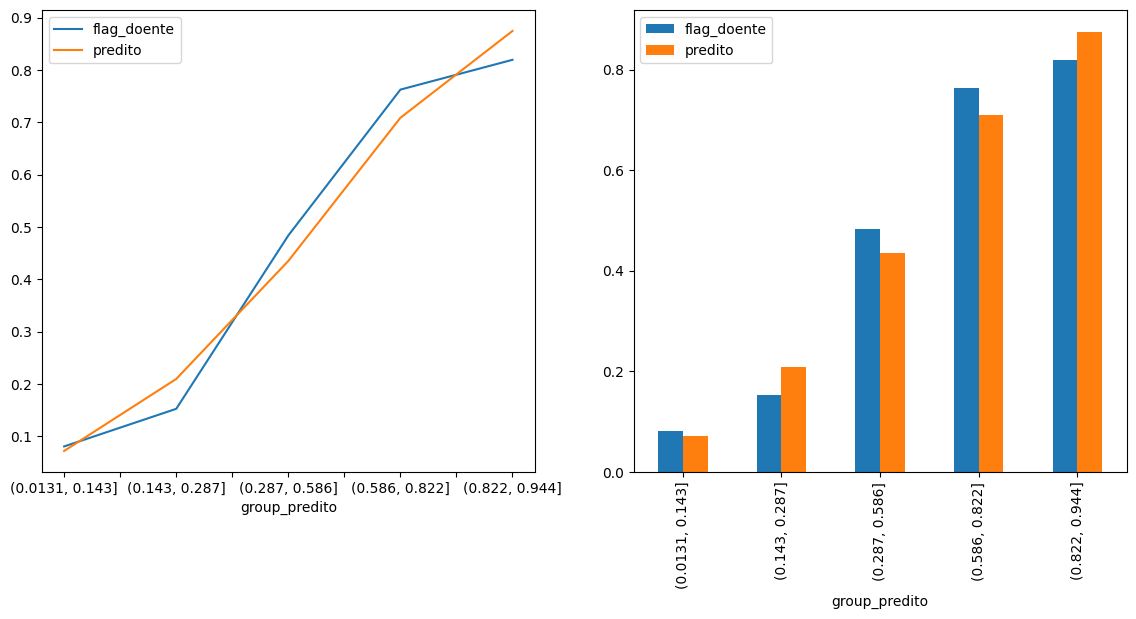

In [324]:
# Comparando graficamente o valor esperado versus observado para a taxa de maus por grupo

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

df[['flag_doente', 'predito', 'group_predito']].groupby(by='group_predito').mean().plot(ax=axes[0])
df[['flag_doente', 'predito', 'group_predito']].groupby(by='group_predito').mean().plot(kind='bar', ax=axes[1])



5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [325]:
# Avaliando o  modelo quanto a discriminação calculando acurácia, GINI e KS.

acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#Gini
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 79.54%
KS: 59.30% 
GINI: 70.39%


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [326]:
# Construindo modelo de regressão logística com as variáveis qualitativas: sex + cp + trestbps + exang e com a variável quantitativa age

reglog_2 = smf.logit("flag_doente ~ C(sex) + C(cp) + exang + trestbps + age", data=df).fit()


reglog_2.summary()

Optimization terminated successfully.
         Current function value: 0.456017
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      295
Method:                           MLE   Df Model:                            7
Date:                Fri, 10 Nov 2023   Pseudo R-squ.:                  0.3389
Time:                        20:49:53   Log-Likelihood:                -138.17
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 2.309e-27
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -8.2872      1.654     -5.010      0.000     -11.529      -5.045
C(sex)[T.1.0]     1.7153      0.361      4.757      0.000       1.009       2.422
C(cp)[T.2.0]      0.0002      0.638      0.000      1.000      -1.250       1.251
C(cp)[T.3.0]      0.0714      0.573      0.125      0.901      -1.052       1.195
C(cp)[T.4.0]      2.0865      0.555      3.760      0.000       0.999       3.174
exang             1.1819      0.341      3.462      0.001       0.513       1.851
trestbps          0.0180      0.009      2.046      0.041       0.001       0.035
age               0.0565      0.018      3.077      0.002       0.021       0.093
=================================================================================
"""

In [327]:
# Gravando as previsões do modelo no dataframe

df['predito_2'] = reglog_2.predict(df)



In [328]:
# Categorizando a probabilidade em G=5 grupos

df['group_predito_2'] = pd.qcut(df['predito_2'], 5, duplicates='drop')

<Axes: xlabel='group_predito_2'>

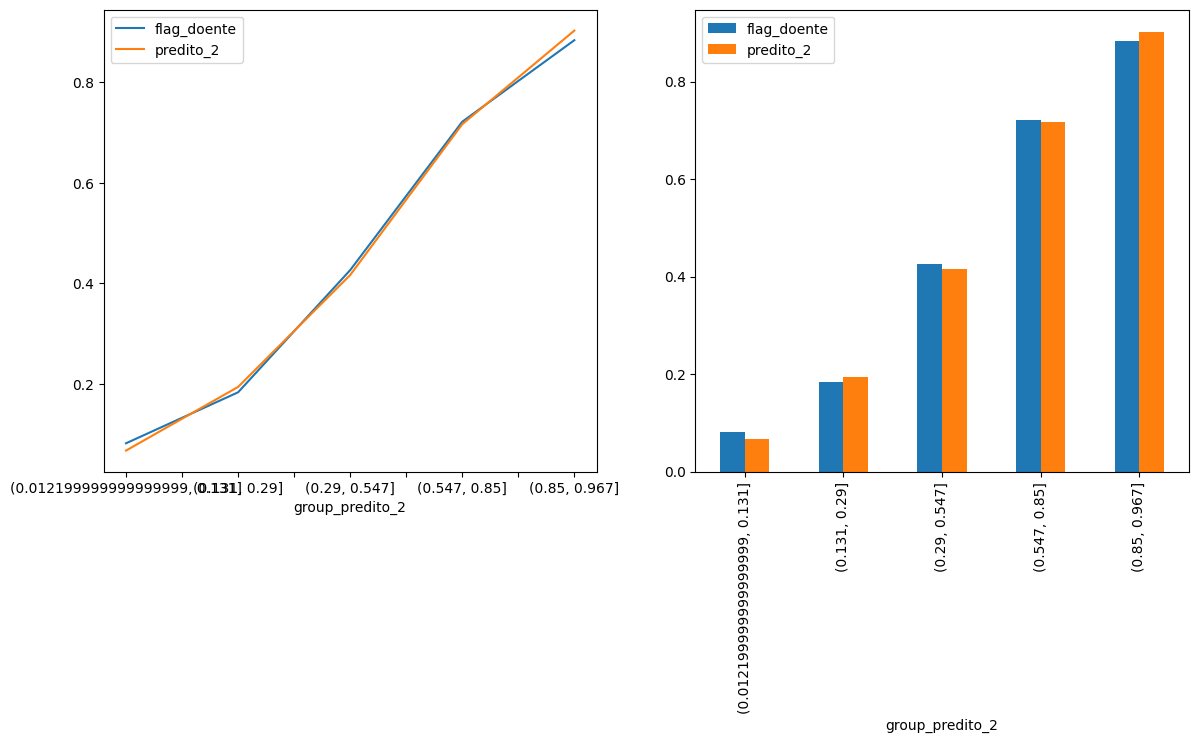

In [329]:
# Comparando graficamente o valor esperado versus observado para a taxa de maus por grupo

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

df[['flag_doente', 'predito_2', 'group_predito_2']].groupby(by='group_predito_2').mean().plot(ax=axes[0])
df[['flag_doente', 'predito_2', 'group_predito_2']].groupby(by='group_predito_2').mean().plot(kind='bar', ax=axes[1])

In [330]:
# Avaliando o NOVO modelo quanto a discriminação calculando acurácia, GINI e KS.

acc = metrics.accuracy_score(df['flag_doente'], df['predito_2']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#Gini
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito_2'])
auc_ = metrics.auc(fpr, tpr)
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito_2'], df.loc[df['flag_doente'] != 1, 'predito_2']).statistic

print('KS: {0:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 78.22%
KS: 61.00% 
GINI: 73.14%


*Comparando-se os gráficos, o novo modelo melhorou significativamente a calibragem, no entanto, obteve acurária um pouco menor*